(600, 1024, 3)

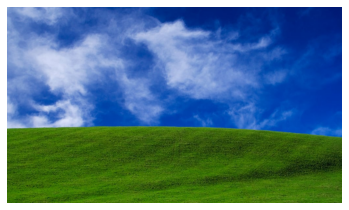

In [4]:
import array
import numpy as np
import cv2
import matplotlib.pyplot as plt
#%matplotlib inline
image = cv2.imread('Image.jpg')

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB, 1)

# preview image
plt.imshow(image)
plt.axis('off');
image.shape

In [5]:
pixel_values = np.reshape(image, (-1, 3))   # 400 * 794

# Convert to float type
pixel_values = np.float32(pixel_values)

pixel_values.shape

(614400, 3)

In [6]:
k = 2
# define stopping criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# perform k-means clustering
# kmeans(data, K, bestLabels, criteria, attempts, flags[, centers])
retval, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# check center points
centers

array([[ 58.56179 , 101.68155 ,  10.84005 ],
       [ 61.57463 , 105.895485, 185.57219 ]], dtype=float32)

In [7]:
# convert data into 8-bit values
centers = np.uint8(centers)
centers

array([[ 58, 101,  10],
       [ 61, 105, 185]], dtype=uint8)

In [8]:
labels.flatten()

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [9]:
# assign centers to labels
segmented_data = centers[labels.flatten()]
segmented_data 

array([[ 61, 105, 185],
       [ 61, 105, 185],
       [ 61, 105, 185],
       ...,
       [ 58, 101,  10],
       [ 58, 101,  10],
       [ 58, 101,  10]], dtype=uint8)

In [10]:
segmented_image = segmented_data.reshape((image.shape))
labels_reshape = labels.reshape(image.shape[0], image.shape[1])

(-0.5, 1023.5, 599.5, -0.5)

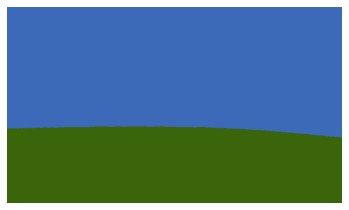

In [11]:
# plot Kmeans results
plt.imshow(segmented_image)
plt.axis('off')

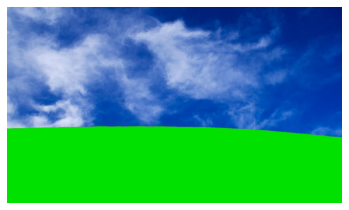

In [12]:
# mask an image segment by cluster
masked_image = np.copy(image)

# turn the mask green! 
cluster = 0                    # the first cluster
masked_image[labels_reshape == cluster] = [0, 225, 0]

plt.imshow(masked_image)
plt.axis('off');

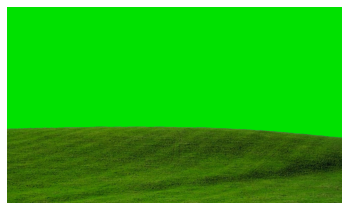

In [13]:
# mask an image segment by cluster
masked_image = np.copy(image)

# turn the mask green!
cluster = 1                    # the second cluster
masked_image[labels_reshape == cluster] = [0, 225, 0]

plt.imshow(masked_image)
plt.axis('off');

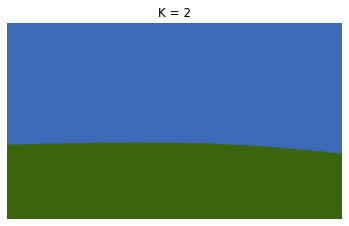

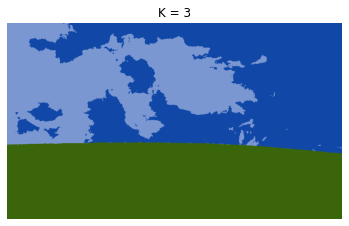

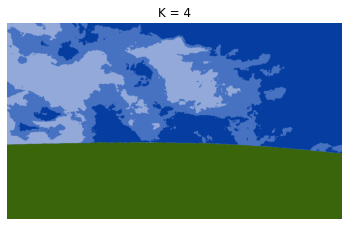

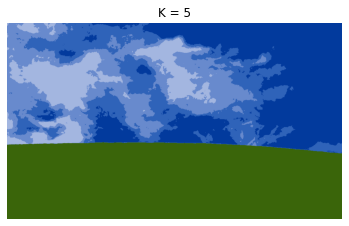

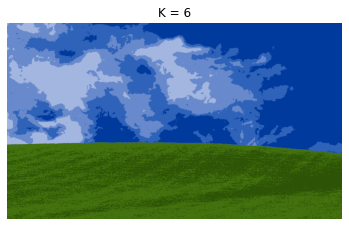

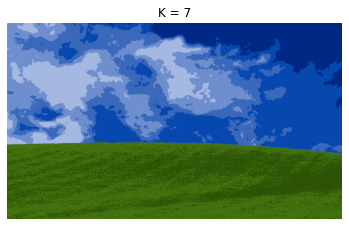

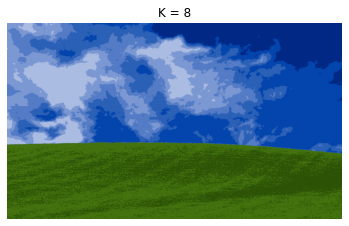

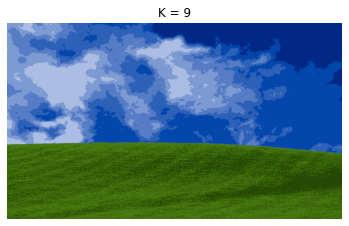

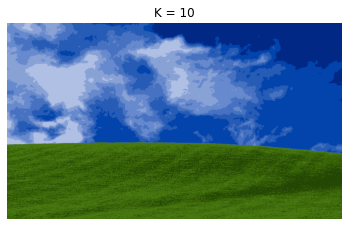

In [14]:
for k in range(2, 11):
    # Implementing kMeans
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    retval, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    centers = np.uint8(centers)
    segmented_data = centers[labels.flatten()]
    segmented_image = segmented_data.reshape((image.shape))
    labels_reshape = labels.reshape(image.shape[0], image.shape[1])
    
    # plot Kmeans results
    plt.imshow(segmented_image)
    plt.title(f"K = {k}")
    plt.axis('off')
    plt.show()